#1. Introduction

This notebook will correspond to the [Introduction to the features of SAS](http://www.ats.ucla.edu/stat/sas/modules/intsas.htm) page. That tutorial covers basic features of SAS and applies them to the cars dataset. The dataset contains variables on **make, price, miles per gallon, repair rating (in 1978), weight in pounds, length in inches,** and whether the car was **foreign** or **domestic**.

Note: If you haven't read the [Intro to Python & FAQ Notebook](../../general/Intro to Python & FAQ.ipynb), please read at this point. It covers important topics like importing packages and declaring objects.

---
##Importing the data
A common way of importing small data within SAS is the `datalines` [statement](https://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a000188182.htm) which enters data directly into a program. In Python  equivalent functionality is possible by creating an object of the `StringIO` [class](https://docs.python.org/2/library/stringio.html) with the data. This object stores a string in memory for us to read in using `read_table()` with `pandas`.

We will store this string in a variable named `datalines`.



###SAS Code
    DATA auto ;
        INPUT make $ price mpg rep78 weight length foreign ;
        datalines;
        [data]
        run;


####Python Code


In [197]:
import StringIO

import pandas as pd

In [160]:
datalines = StringIO.StringIO('''
AMC     4099 22  3     2930   186    0
AMC     4749 17  3     3350   173    0
AMC     3799 22  3     2640   168    0
Audi    9690 17  5     2830   189    1
Audi    6295 23  3     2070   174    1
BMW     9735 25  4     2650   177    1
Buick   4816 20  3     3250   196    0
Buick   7827 15  4     4080   222    0
Buick   5788 18  3     3670   218    0
Buick   4453 26  3     2230   170    0
Buick   5189 20  3     3280   200    0
Buick  10372 16  3     3880   207    0
Buick   4082 19  3     3400   200    0
Cad.   11385 14  3     4330   221    0
Cad.   14500 14  2     3900   204    0
Cad.   15906 21  3     4290   204    0
Chev.   3299 29  3     2110   163    0
Chev.   5705 16  4     3690   212    0
Chev.   4504 22  3     3180   193    0
Chev.   5104 22  2     3220   200    0
Chev.   3667 24  2     2750   179    0
Chev.   3955 19  3     3430   197    0
Datsun  6229 23  4     2370   170    1
Datsun  4589 35  5     2020   165    1
Datsun  5079 24  4     2280   170    1
Datsun  8129 21  4     2750   184    1
''')

<div class="pynote">
<b>Python Note</b>: Multiline strings start with triple quotes <code>'''</code>.
</div>

In [161]:
auto = pd.read_table(datalines,
                     delim_whitespace=True,
                     names=['make', 'price', 'mpg', 'rep78',
                            'weight', 'length', 'foreign'])

In [162]:
datalines.close()

<div class="pynote">
<b>Python Note</b>:
<code>pd.read_table</code> calls the <code>read_table()</code> function from the <code>pandas</code> package. The first argument is the data we want to read, in this instance our <code>datalines</code> variable. Often you'll replace this first argument with a file location pointing to the file you want to read into a <em>DataFrame</em>. The <code>delim_whitespace=</code> argument informs the function that the file should parse whitespace as a delimiter. The <code>names</code> argument is similar to SAS <code>INPUT</code> statement, which provides names for all the variables. One difference is that the variables' type is inferred rather than explicitly stated by using the <code>$</code> indicator in SAS.
<br><br>
Additionally, you may also notice python's implied line continuation. When a line of code gets uncomfortably long (the hard rule is 79 characters), you can split any arguments within parenthesis at commas. Be sure that your indentation makes sense as well.
<br><br>
<code>datalines.close()</code> frees up the memory buffer we created to store our string object. We won't need it anymore since the data is now stored in <code>auto</code>.
</div>

## Viewing a sample of the data
`PROC PRINT` prints a sample of the data to ODS. In Python, .head() is a function that performs equivalently on a `DataFrame` object. Instead of the `obs=10` argument it's `n=10` or simply `10` inside the parenthesis.

###SAS Code
    PROC PRINT DATA=auto(obs=10);
    RUN;    
####Python Code

In [163]:
auto.head(10)

,make,price,mpg,rep78,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1
5,BMW,9735,25,4,2650,177,1
6,Buick,4816,20,3,3250,196,0
7,Buick,7827,15,4,4080,222,0
8,Buick,5788,18,3,3670,218,0
9,Buick,4453,26,3,2230,170,0


<div class="pynote">
<b>Python Note</b>: All objects are <a href="https://en.wikipedia.org/wiki/Zero-based_numbering">zero indexed</a>.
</div>

##2. Descriptive Statistics
Similar to SAS's `PROC MEANS` is the  `.describe()` function called on a `DataFrame`. This will print out basic descriptive statistics on all continuous variables by default, and also contains some overlap with the distributional details of `PROC UNIVARIATE`.

###SAS Code
    PROC MEANS DATA=auto;
    RUN; 
    
####Python Code

In [164]:
auto.describe()

,price,mpg,rep78,weight,length,foreign
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000


You can get descriptive statistics separately for foreign and domestic cars (i.e. broken down by *foreign*) as shown below. For additional reference, see `pandas` [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) documentation.

In [165]:
auto.groupby('foreign').describe()

length        mpg         price      rep78       weight
foreign                                                                   
0       count   19.000000  19.000000     19.000000  19.000000    19.000000
        mean   195.421053  19.789474   6484.157895   2.947368  3347.894737
        std     17.963901   4.035660   3768.461479   0.524265   627.176911
        min    163.000000  14.000000   3299.000000   2.000000  2110.000000
        25%    182.500000  16.500000   4090.500000   3.000000  3055.000000
        50%    200.000000  20.000000   4816.000000   3.000000  3350.000000
        75%    205.500000  22.000000   6807.500000   3.000000  3785.000000
        max    222.000000  29.000000  15906.000000   4.000000  4330.000000
1       count    7.000000   7.000000      7.000000   7.000000     7.000000
        mean   175.571429  24.000000   7106.571429   4.142857  2424.285714
        std      8.462804   5.507571   2101.828240   0.690066   325.159302
        min    165.000000  17.000000   4589.000000   3.000000  2020.000000
        25%    170.000000  22.000000   5654.000000   4.000000  2175.000000
        50%    174.000000  23.000000   6295.000000   4.000000  2370.000000
        75%    180.500000  24.500000   8909.500000   4.500000  2700.000000
        max    189.000000  35.000000   9735.000000   5.000000  2830.000000

<div class="pynote">
<b>Python Note</b>: Above is the first example of method chaining, a powerful feature that allows you to chain functions together in a single line of code since each function returns an object.
<br><br>
Above we use the <code>.groupby()</code> method which returns a groupby object. We can then directly apply the <code>.describe()</code> method to that object.
<br><br>
Without this feature we'd have to break up the code each step of the way, which is far less convenient and readable.
<br><br>
You'll use method chaining quite frequently with <em>DataFrames</em> so it's good to become comfortable with it.
</div>

##Detailed Univariate Statistics
The next point in the original tutorial covers `PROC UNIVARIATE` on the **price** variable. `PROC UNIVARIATE` has a significant amount of output. We'll try and replicate the main functions of that proc, but will leave other functions (like t-tests) out of it. We'll cover:
- Skew / Kurtosis
- Extreme observations (top / bottom 5)
- Additional quintiles beyond 0/25/50/75/100%

**Skew / Kurtosis**  
`pandas` has built in [Skew](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.skew.html) / [Kurtosis](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.kurtosis.html) functions that operate on a data frame. We will specify a column/variable to apply these functions to by using typical `pandas` [dictionary notation](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#column-selection-addition-deletion).

In [166]:
auto['price'].skew()

1.4707269994573371

In [167]:
auto['price'].kurtosis()

1.5346717037845785

**Extreme Observations (Top & Bottom 5)**  
To do this, we'll apply the `.order()` function on the **price** series first and use the simple `.head()` and `.tail()` functions on that ordered series.

In [168]:
auto['price'].order().head() # Bottom 5 (Minimums) and observation numbers

16    3299
20    3667
2     3799
21    3955
12    4082
Name: price, dtype: int64

In [169]:
auto['price'].order().tail() # Top 5 (Maximums) and observation numbers

5      9735
11    10372
13    11385
14    14500
15    15906
Name: price, dtype: int64

**Bonus**: The .order() function has an optional argument that changes the default sort order. We can also use this to display, highest to lowest, the greatest 5 values.

In [170]:
auto['price'].order(ascending=False).head() # Top 5 (Maximums), greatest to least

15    15906
14    14500
13    11385
11    10372
5      9735
Name: price, dtype: int64

**Additional quintiles beyond 0/25/50/75/100%**  
`pandas` `.quantile()` function returns the quantile value given a list of percentages.

In [171]:
auto['price'].quantile([.99, .95, .90, .10, .05, .01])

0.99    15554.50
0.95    13721.25
0.90    10878.50
0.10     3877.00
0.05     3700.00
0.01     3391.00
dtype: float64

**Bonus**: You can also supply a `percentiles=` argument to `.describe()` to get similar output, however, it returns the values out of the given order.

In [172]:
auto['price'].describe(percentiles=[.99, .95, .90, .10, .05, .01])

count       26.000000
mean      6651.730769
std       3371.119809
min       3299.000000
10%       3877.000000
5%        3700.000000
1%        3391.000000
50%       5146.500000
99%      15554.500000
95%      13721.250000
90%      10878.500000
max      15906.000000
Name: price, dtype: float64

## Frequency Distributions
`PROC FREQ` is one of the most commonly used procedures in SAS. Similar, stripped down, functionality is avialble via the `.value_counts()` function applied on a series.

###SAS Code
    PROC FREQ DATA=auto;
        TABLES rep78 ;
    RUN;
    
####Python Code

In [173]:
auto['rep78'].value_counts()

3    15
4     6
2     3
5     2
dtype: int64

`.value_counts()` will return values from greatest to least occuring element. To turn this off, supply a `sort=False` argument.

In [174]:
auto['rep78'].value_counts(sort=False)

2     3
3    15
4     6
5     2
dtype: int64

To view values as a percentage, supply the `normalize=True` argument. Multiple arguments can also be provided, for example if you don't want to sort the elements.

In [175]:
auto['rep78'].value_counts(normalize=True, sort=False)

2    0.115385
3    0.576923
4    0.230769
5    0.076923
dtype: float64

##Two-Way Frequency Tables
`PROC FREQ` with a `TABLES` statement will return a two-way frequency table with the variables given. 

    PROC FREQ DATA=auto ;
        TABLES rep78 * foreign ;
    RUN; 
    
Similar functionality through `pandas` is given through the `crosstab` function.

####Python Code

In [176]:
pd.crosstab(auto['rep78'], auto['foreign'], margins=True)

foreign,0,1,All
rep78,,,
2,3,0,3
3,14,1,15
4,2,4,6
5,0,2,2
All,19,7,26


<div class="construction">
<b>To be completed</b>: crosstabs with row and column percentages.
<br>
https://github.com/pmbaumgartner/Python-for-SAS-Users/issues/1
<br><br>
Possible Solution: http://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
</div>

##3. Making Graphs

Making graphs and plotting in SAS is done through a few different procedures (GCHART/PLOT). With `pandas` there is a wrapper to `matplotlib`, one of the original Python plotting libraries. This should cover most of your plotting needs without installing additional packages.

Usage is quite simple: you can call the `.plot()` method on any Series or FataFrame and it should figure out the rest based on the type of data. You can also supply [additional arguments](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.htm) to the plot function.

###SAS Code
    TITLE 'Bar Chart with Discrete Option';
    PROC GCHART DATA=auto;
        VBAR rep78/ DISCRETE;
    RUN; 
    
####Python Code

In [177]:
%matplotlib inline

<div class="pynote">
<b>Python Note</b>: That line of code above is an <a href="https://ipython.org/ipython-doc/3/notebook/notebook.html#plotting">IPython Magic Command</a>. If we don't include this, our plots open in another window by default. If you run into an issue where plots don't show up, be sure you include this line of code in your notebook somewhere.
</div>

We'll again use the dictionary representation to select the `rep78` variable. Now, the variable itself isn't in the format we want it in -- currently it's an integer which by default the plot will be a line chart. Don't worry if this doesn't make sense. What we're interested is the count of each value of `rep78`, so we can use `.value_counts()` to roll it up, then plot those values.

We want to supply the `sort=False` argument to `.value_counts()`, otherwise our bar chart will be in descending order by count.

Two arguments are supplied to the `.plot` method: `kind='bar'` indicates that we want a bar chart, and `title=` allows us to give a title to the chart.

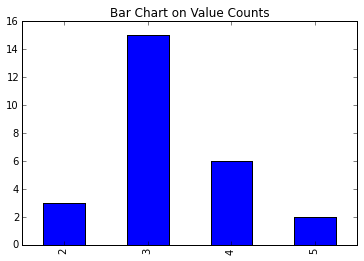

In [178]:
auto['rep78'].value_counts(sort=False).plot(kind='bar',
                                            title="Bar Chart on Value Counts")

<div class="pynote">
<b>Python Note</b>: It's always a good idea to try the code for yourself and modify parts of the code to see how they change the output. You can download this IPython Notebook file and run it yourself.
<br><br>
Try experimenting with the cell above. What happens if you don't apply <code>.value_counts()</code>? What's the default plot for the data if we don't supply <code>kind='bar'</code>?
<br><br>
You will learn far more dissecting the code than reading your way through a tutorial.
</div>

<div class="resources">
There's much more plotting functionality covered in the `pandas` <a href="http://pandas.pydata.org/pandas-docs/stable/visualization.html">plotting documentation.</a>
<br><br>
There are also tons of great <a href="http://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization">visualization packages</a> available for Python. I'm partial to <a href="http://stanford.edu/~mwaskom/software/seaborn/">seaborn</a> myself.
</div>

##4. Correlation, regression and analysis of variance
Correlation, regression, and analysis of variance will require us to expand our program's functionality beyond what's in the `pandas` package. We'll be importing some new packages to handle the regression and ANOVA portions, but correlation is simple enough to be handled with `pandas`.

##Correlation
With SAS's `PROC CORR` the output is simple statistics (which we've covered with `.describe()`, a correlation matrix with Pearson's correlation coefficients, and a hypothesis test with: <img src="http://support.sas.com/documentation/cdl/en/procstat/63104/HTML/default/images/procstat_corr0004.png">


###SAS Code
    PROC CORR DATA=auto ;
        VAR price mpg weight length ;
    RUN; 

####Python Code
First, we're going to create a list of the variables we're interested in so we can subset our *DataFrame*. We'll store this list of columns in the `columns` variable. Declaring a list variable with the columns were interested in is something we'll do pretty frequently in Python.

In [179]:
corr_columns = ['price', 'mpg', 'weight', 'length']

Now, we can subset our `auto` *DataFrame* on those columns using the similar dictionary notation as calling for a single column, except this time we're providing our list variable.

We'll take this subsetted *DataFrame* and apply the `.corr()` method to it.

In [180]:
auto[corr_columns].corr()

,price,mpg,weight,length
price,1.000000,-0.438462,0.556072,0.436035
mpg,-0.438462,1.000000,-0.808161,-0.768052
weight,0.556072,-0.808161,1.000000,0.906536
length,0.436035,-0.768052,0.906536,1.000000


**Hypothesis Testing**  
There's no built-in hypothesis testing for correlation into `pandas`, so we're going to import a function from the `scipi.stats` module.

In [181]:
from scipy.stats import pearsonr

`pearsonr()` takes two arguments: an X and Y variable you want to correlate. We'll supply two of our columns we're curious about -- **weight** and **mpg**.

In [182]:
pearsonr(auto['weight'], auto['mpg'])

(-0.80816094828017604, 5.9349102587315488e-07)

<div class="pynote">
<b>Python Note</b>: Argh, they just can't make it easy for us, can they? What are those two values and why do they have parenthesis around them?
<br><br>
One of the things you'll get used to is reading the documentation find out what a function or method <em>returns</em> (i.e. outputs). In our case, `pearsonr()` <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr">returns a tuple</a> with the value of <em>r</em> and the p-value of the hypothesis test.
<br><br>
Tuples themselves are out of scope of this tutorial, but you can always read more at the <a href="https://docs.python.org/2/library/functions.html#tuple">documentation</a>.

We're going to store the results to an object, then we'll use indexing to call the second item of that object (which is a *tuple*). Remember that python is zero indexed. Then, we'll use python's `format()` function to display the number.

In [183]:
pearsonr_results = pearsonr(auto['weight'], auto['mpg'])
p_value = pearsonr_results[1]
"{:08.8f}".format(p_value)

'0.00000059'

<div class="resources">
<a href="https://pyformat.info">Here</a> is the best resource I've found on using formats in Python. At least they're somewhat similar to SAS formats.
</div>

##Regression
`PROC REG` is the standard procedure for linear regression in SAS. For Python, everything you need for statistical modeling is in the `statsmodels` [module](http://statsmodels.sourceforge.net/).

We'll try and predict **mpg** from **weight**, **length**, and **foreign** using multiple linear regression.

###SAS Code
    PROC REG DATA=auto;
        MODEL mpg = weight length foreign ;
    RUN;
    
####Python Code

In [184]:
import statsmodels.api as sm

After we import `statsmodels`, I find it easiest to use [matrix notation](https://en.wikipedia.org/wiki/Linear_regression#Introduction_to_linear_regression) to conceptualize our regression. In that vein, we'll assign our design matrix `X` and our target vector `Y`.

In [185]:
X = auto[['weight', 'length', 'foreign']]
Y = auto['mpg']

`SAS` adds an intercept automatically for regressions, unless you use the `NOINT` option on the `MODEL` statement. For `statsmodels` we have to manually add the intercept/constant. There's a convienent function, `add_constant()`, that we can use to add an intercept column to our design matrix. 

In [186]:
X = sm.add_constant(X)

<div class="pynote">
<b>Python Note</b>: An expression will always be resolved before it is assigned to a variable. Above, we're calling the <code>.add_constant()</code> method on <code>X</code>, which <a href="http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html">returns a matrix with a constant added</a>, and then reassigning that value to <code>X</code>. This overwites the previous value of <code>X</code>, which is fine because we don't need the values without an intercept.
</div>

Next we'll create the model object and provide our target vector and design matrix as arguments. We'll store the model in the `mod` variable.

In [187]:
mod = sm.OLS(Y, X)

Now the model object exists, but it hasn't been fit to the data yet. To do that, we have to call the `.fit()` method on the model. We'll do that below, then store the fit model in the `res` variable.

In [188]:
res = mod.fit()

Finally, we have the results of the model fit. To display statistics about the fitted model, we are going to call the `.summary()` method on the `res` object and print it.

In [189]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     14.84
Date:                Tue, 28 Jul 2015   Prob (F-statistic):           1.67e-05
Time:                        17:45:07   Log-Likelihood:                -62.552
No. Observations:                  26   AIC:                             133.1
Df Residuals:                      22   BIC:                             138.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         44.9686      9.323      4.824      0.0

We finally have something that looks similar to SAS output! The exact details of the output are outside of the scope of this tutorial, but hopefully you'll notice that most of the essential pieces of the model are there as well as some helpful *Warnings*.

## ANOVA / GLM
For our final results, we're going to run an ANOVA to see if MPG is the same for foreign and domestic cars.

In addition, we're going to look at `statsmodels` *formula* functionality, which allows us to input general linear model equations with [R-style formulas](http://statsmodels.sourceforge.net/devel/example_formulas.html). You may be asking WHY, as I did, and the answer to that is because `statsmodels` [ANOVA method](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.anova.anova_lm.html) only applies to models that have been input using the formula methodology.

###SAS Code
    PROC GLM DATA=auto;
        CLASS foreign ;
        MODEL mpg = foreign ;
    RUN; 

####Python Code
First we need to import the formula API from statsmodels. We'll specifically just import the `ols` method.

In [190]:
from statsmodels.formula.api import ols

Now we'll declare our formula as a string. We could type the string straight into our `ols()` function, but it's good practice to declare it as a separate variable so we can adjust it as needed. The variables in the formula need to correspond to variables/columns in our `auto` *DataFrame*.

In [191]:
formula = 'mpg ~ foreign'

Similarly to our Regression example, we have to create a model object first then fit the model with our data. We'll do both steps in the same cell below.

The `ols` (notice the lowercase) function takes two arguments: the `formula` that describes our model, and the `data=` argument which points to our dataframe. The columns listed in `formula` match those in a *DataFrame* supplied to the `data=` argument.

In [192]:
anova = ols(formula, data=auto)
anova_res = anova.fit()

Finally, we're going to look at our ANOVA results. Here we're calling the `.anova_lm()` method from the `stats` module from the statsmodels API we originally imported as `sm`. It takes our model results as an argument and we can optionally tell it to give us Type II Sum of Squares with the `typ=` argument 

<div class="pynote">
<b>Python Note</b>: If you're scratching your head why we can just call `ols()`, but have to write out the entire `sm.stats.anova_lm()` statement below, it would be helpful to review *Imports* in the Intro to Python Notebook.
</div>

In [193]:
print sm.stats.anova_lm(anova_res, typ=2)

              sum_sq  df         F    PR(>F)
foreign    90.688259   1  4.580621  0.042704
Residual  475.157895  24       NaN       NaN


Great! A Pr(>F) of 0.042. If our alpha and p-value were 0.05, then we would reject the null hypothesis of no difference. There is a statistical difference between Foreign and Domestic cars when it comes to MPG!

The output may be a little less than SAS, but additional output is avaialable by investigating some of the attributes of our fit model. Below we'll take a look at Total Sum of Squares, R-squared, and Mean Squared Error. You can read the [documentation](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html) for a full list of model attributes.

In [194]:
print "TSS:", anova_res.centered_tss
print "R^2", anova_res.rsquared
print "MSE (Not Root):", anova_res.mse_resid

TSS: 565.846153846
R^2 0.160270169715
MSE (Not Root): 19.798245614


That completes our tutorial. At this point you should be able to replicate the general functinoality of the [Introduction to the Features of SAS](http://www.ats.ucla.edu/stat/sas/modules/intsas.htm) tutorial from UCLA.

------

In [195]:
# This cell imports the styling for this notebook. You can safely ignore it.

from IPython.display import HTML

def css_styling():
    styles = open("../../_styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [196]:
!python -V

Python 2.7.10 :: Anaconda 2.2.0 (x86_64)
